In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn')
sns.set_palette("husl")


# View Mean and Var of Each Variable
# Check outliers

forest_train_set = pd.read_csv('training.csv')



In [3]:
forest_train_set.head()
# View "Average" Profile of each Ecosystem based on Bands (alone)

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [2]:
forest_types = forest_train_set.groupby(["class"], as_index = False)
average_vals_per_forest = forest_types["b1","b2","b3","b4","b5","b6","b7","b8","b9"].mean()
average_vals_per_forest 




,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,d,53.314815,48.314815,68.407407,97.666667,63.185185,103.314815,98.740741,26.074074,56.462963
1,h,78.270833,29.395833,55.145833,113.666667,50.229167,95.250000,98.000000,25.104167,60.062500
2,o,65.081081,66.540541,87.972973,103.621622,77.702703,118.108108,91.567568,44.189189,77.945946
3,s,57.966102,27.796610,51.050847,93.474576,49.677966,91.661017,76.525424,24.288136,55.677966


In [ ]:
# sns.catplot(x="who", y="survived", col="class", hue =
#...                 data=titanic, saturation=.5,
#...                 kind="bar", ci=None, aspect=.6)
#>>> (g.set_axis_labels("", "Survival Rate")

#>>> g = sns.catplot(x="who", y="survived", col="class",
#...                 data=titanic, saturation=.5,
#...                 kind="bar", ci=None, aspect=.6)
#>>> (g.set_axis_labels("", "Survival Rate")
#...   .set_xticklabels(["Men", "Women", "Children"])
#...   .set_titles("{col_name} {col_var}")
#...   .set(ylim=(0, 1))
#...   .despine(left=True))  

/Users/tim/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


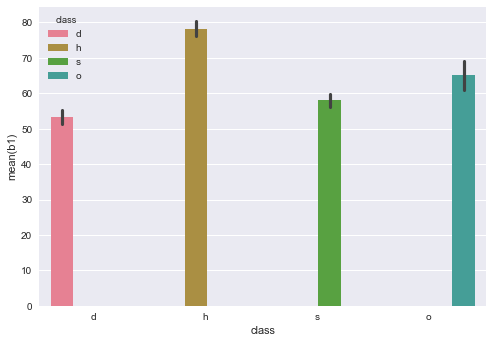

In [5]:
ax = sns.barplot(x= "class", y = "b1", hue="class", data=forest_train_set)



In [4]:
# Creat bands for each type

forest_types = forest_train_set.groupby(["class"], as_index = False)
average_vals_per_forest = forest_types["b1","b2","b3","b4","b5","b6","b7","b8","b9"].mean()
average_vals_per_forest_trans = average_vals_per_forest.transpose(copy = True).reset_index()

print(average_vals_per_forest_trans)
average_vals_per_forest_trans.columns = average_vals_per_forest_trans.iloc[0]
average_vals_per_forest_trans.columns = ['spectral_band', 'd', 'h', 'o', 's']
print (average_vals_per_forest_trans)
average_vals_per_forest_trans = average_vals_per_forest_trans.drop(average_vals_per_forest_trans.index[0])

print(average_vals_per_forest_trans)

#average_vals_per_forest_trans[["d","h", "o","s"]] = average_vals_per_forest_trans[["d","h", "o","s"]].apply(pd.to_numeric)

   index        0        1        2        3
0  class       d        h        o        s 
1     b1  53.3148  78.2708  65.0811  57.9661
2     b2  48.3148  29.3958  66.5405  27.7966
3     b3  68.4074  55.1458   87.973  51.0508
4     b4  97.6667  113.667  103.622  93.4746
5     b5  63.1852  50.2292  77.7027   49.678
6     b6  103.315    95.25  118.108   91.661
7     b7  98.7407       98  91.5676  76.5254
8     b8  26.0741  25.1042  44.1892  24.2881
9     b9   56.463  60.0625  77.9459   55.678
  spectral_band        d        h        o        s
0         class       d        h        o        s 
1            b1  53.3148  78.2708  65.0811  57.9661
2            b2  48.3148  29.3958  66.5405  27.7966
3            b3  68.4074  55.1458   87.973  51.0508
4            b4  97.6667  113.667  103.622  93.4746
5            b5  63.1852  50.2292  77.7027   49.678
6            b6  103.315    95.25  118.108   91.661
7            b7  98.7407       98  91.5676  76.5254
8            b8  26.0741  25.1042  44

/Users/tim/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


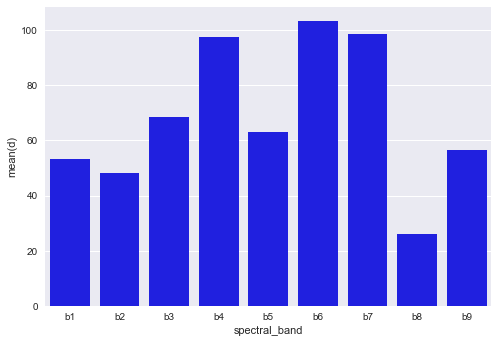

In [7]:
axd = sns.barplot(x= "spectral_band", y="d", color = 'blue', data=average_vals_per_forest_trans)
#https://seaborn.pydata.org/generated/seaborn.barplot.html

/Users/tim/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


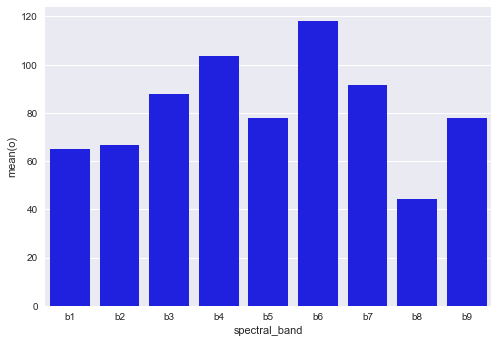

In [8]:
axo = sns.barplot(x= "spectral_band", y="o", color = 'blue', data=average_vals_per_forest_trans)

/Users/tim/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


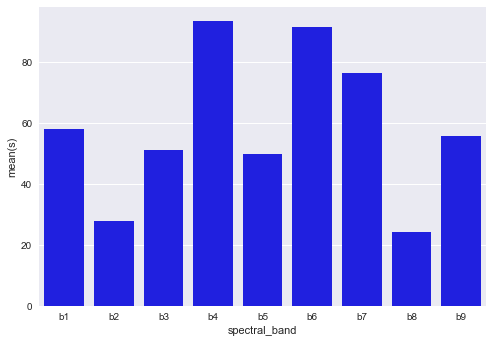

In [9]:
axs= sns.barplot(x= "spectral_band", y="s", color = 'blue', data=average_vals_per_forest_trans)

/Users/tim/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


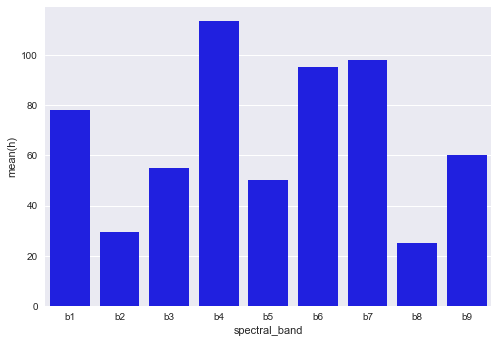

In [10]:
axs= sns.barplot(x= "spectral_band", y="h", color = 'blue', data=average_vals_per_forest_trans)

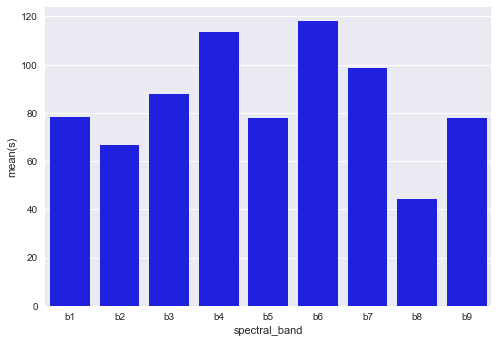

In [103]:
#average_vals_per_forest["b1"].plot(kind="bar")
#average_vals_per_forest_trans["class"]

#plt.bar(x= average_vals_per_forest.iloc[1])






#fig, ax = plt.subplots()
#average_vals_per_forest["b1","b2"].plot(kind="bar", ax=ax, legend = False)
#df.groupby('country').plot(x='year', y='unemployment', ax=ax, legend=False)
# https://www.dataquest.io/blog/pandas-tutorial-python-2/
#https://www.dataquest.io/blog/pandas-tutorial-python-2/

In [11]:
h_avg_spect = average_vals_per_forest.iloc[1]
print(h_avg_spect) 

class         h 
b1       78.2708
b2       29.3958
b3       55.1458
b4       113.667
b5       50.2292
b6         95.25
b7            98
b8       25.1042
b9       60.0625
Name: 1, dtype: object


[[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]]


/Users/tim/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:17: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


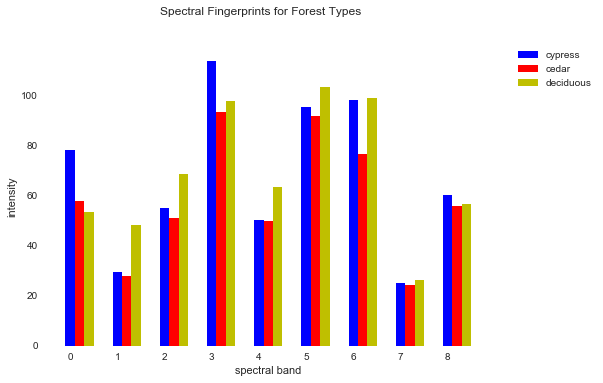

In [12]:
sb = list(average_vals_per_forest_trans['spectral_band'])
d = np.array(average_vals_per_forest_trans['d'])
h = np.array(average_vals_per_forest_trans['h'])
o = np.array(average_vals_per_forest_trans['o'])
s = np.array(average_vals_per_forest_trans['s'])

X = np.arange(9)
fill = np.full((1,10),.1)

print(fill)

fig, ax = plt.subplots()
plt.bar(X, h, color = 'b', width = 0.20, label = "cypress")
plt.bar(X + 0.20, s, color = 'r', width = 0.20, label = "cedar")
plt.bar(X + 0.400, d, color = 'y', width = 0.20, label = "deciduous")

ax.set_axis_bgcolor('white')
fig.suptitle("Spectral Fingerprints for Forest Types")
plt.xlabel("spectral band")
plt.ylabel("intensity")
plt.xticks(X)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
                              
# Maybe remove the background and make the axes stand-out a bit more?
#

/Users/tim/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


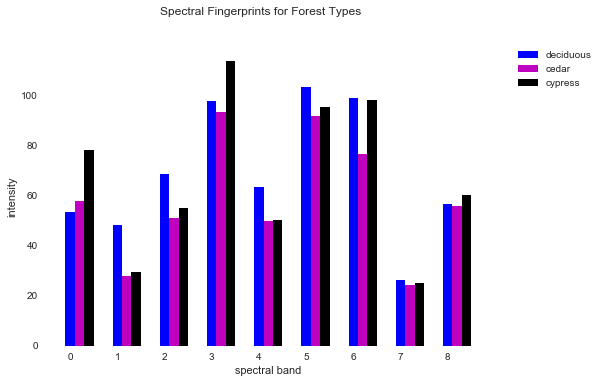

In [20]:
fig, ax = plt.subplots()
plt.bar(X, d, color = 'b', width = 0.20, label = "deciduous")
plt.bar(X + 0.20, s, color = 'm', width = 0.20, label = "cedar")
plt.bar(X + 0.400, h, color = 'black', width = 0.20, label = "cypress")

ax.set_axis_bgcolor('white')
fig.suptitle("Spectral Fingerprints for Forest Types")
plt.xlabel("spectral band")
plt.ylabel("intensity")
plt.xticks(X)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# https://www.packtpub.com/mapt/book/big_data_and_business_intelligence/9781849513265/1/ch01lvl1sec16/plotting-multiple-bar-charts

<Container object of 9 artists>

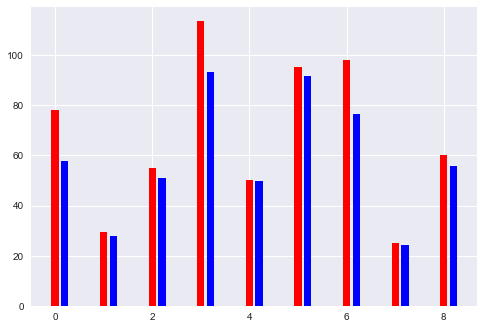

In [144]:
X = np.arange(9)
fill = np.full((1,10),.1)
plt.bar(X + 0.00, h, color = 'r', width = 0.15)
plt.bar(X + 0.20, s, color = 'b', width = 0.15)
#plt.bar(X + .40, fill , color = 'w', width = 0.15)